In [ ]:
!pip install pandas 
!pip install numpy 
!pip install seaborn 
!pip install matplotlib 
!pip install os 
!pip install plotly 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import os 
import plotly as px 

In [ ]:
cwd = os.getcwd()
file = os.listdir(cwd)
print("File in %r: %s" %(cwd, file))

In [3]:
data = pd.read_csv("..\\Datasets\\spotify_dataset.csv")
data.head(2)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db


In [4]:
print("ROWS:{}".format(data.shape[0]))
print("COLUMNS:{}".format(data.shape[1]))
print("\nDUPLICATES:{}".format(data.duplicated().sum()))
print("\nNULL VALUES:\n{}".format(data.isnull().sum()))

ROWS:1556
COLUMNS:23

DUPLICATES:0

NULL VALUES:
Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64


In [5]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ", "_")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      1556 non-null   int64 
 1   highest_charting_position  1556 non-null   int64 
 2   number_of_times_charted    1556 non-null   int64 
 3   week_of_highest_charting   1556 non-null   object
 4   song_name                  1556 non-null   object
 5   streams                    1556 non-null   object
 6   artist                     1556 non-null   object
 7   artist_followers           1556 non-null   object
 8   song_id                    1556 non-null   object
 9   genre                      1556 non-null   object
 10  release_date               1556 non-null   object
 11  weeks_charted              1556 non-null   object
 12  popularity                 1556 non-null   object
 13  danceability               1556 non-null   object
 14  energy  

In [7]:
data['week_of_highest_charting_start'] = data['week_of_highest_charting'].apply(lambda x: \
                                                                               x.split("--")[0])
data['week_of_highest_charting_end'] = data['week_of_highest_charting'].apply(lambda x: \
                                                                               x.split("--")[1])

data['streams'] = data['streams'].apply(lambda x: x.replace(",", ""))
data['artist_followers'] = data['artist_followers'].apply(lambda x: x.replace(",", ""))
data['streams'] = data['streams'].astype(int)

In [ ]:
data['artist_followers'] = data['artist_followers'].apply(lambda x: int(float(x)))
#given ValueError raised to convert artist_followers, I'm looking into "artist follower" values further
#to see why quick conversion isn't working as intended

In [11]:
data[~data['artist_followers'].str.isnumeric()]['artist_followers'].value_counts()
#there are 11 entries that contain no artist followers, so that's why the above function wasn't working 
#if there is one issue, there are probably a few more, so I'm going to look into that

     11
Name: artist_followers, dtype: int64

In [12]:
dup_IDs = data['song_id'].value_counts().head(50)
dup_IDs = dup_IDs[1:29]
dup_IDs = pd.DataFrame(dup_IDs)
dup_IDs.reset_index(drop=False, inplace=True)
#there are also several song IDs that were counted multiple times; this may have to do with how artists were
#input into the system (ordering)
dup_IDs

,index,song_id
0,5uEYRdEIh9Bo4fpjDd4Na9,3
1,4S2uhQE8L9V6p7rj7SiauJ,2
2,35UUpTmrcFXNIVIN26ujXl,2
3,2YpeDb67231RjR0MgVLzsG,2
4,4lUmnwRybYH7mMzf16xB0y,2
5,0oQc0F6KUE7QY7k5TU6bic,2
6,7wsmIIm0xWmtP7TmACXkJn,2
7,1iQDltZqI7BXnHrFy4Qo1k,2
8,1D3z6HTiQsNmZxjl7F7eoG,2
9,2MbdDtCv5LUVjYy9RuGTgC,2


In [13]:
#going to take the ID that's duplicated 3 times to see what's actually going on here
data[data['song_id']=='5uEYRdEIh9Bo4fpjDd4Na9']
#song names have same ID because they are either remixes or have variations within artist series 

,index,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,song_id,genre,...,loudness,speechiness,acousticness,liveness,tempo,duration_(ms),valence,chord,week_of_highest_charting_start,week_of_highest_charting_end
84,85,32,28,2021-04-30--2021-05-07,Goosebumps - Remix,7452633,"Travis Scott, HVME",17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",...,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db,2021-04-30,2021-05-07
144,145,13,83,2020-04-24--2020-05-01,goosebumps,5691540,Travis Scott,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",...,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db,2020-04-24,2020-05-01
407,408,33,24,2021-01-08--2021-01-15,Goosebumps,5496962,HVME,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",...,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db,2021-01-08,2021-01-15


In [15]:
duplicated_df = pd.DataFrame() 
for i in dup_IDs['index']: 
    j = pd.DataFrame(data[data['song_id'] == i])
    duplicated_df = duplicated_df.append(j)
print(duplicated_df.shape)

(57, 25)


In [16]:
data = data.loc[data['song_id'] != ' ']
data.drop_duplicates('song_id', inplace=True)
data['song_id'].value_counts() # confirming that all duplicate song IDs have been removed 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 0 to 1555
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           1516 non-null   int64 
 1   highest_charting_position       1516 non-null   int64 
 2   number_of_times_charted         1516 non-null   int64 
 3   week_of_highest_charting        1516 non-null   object
 4   song_name                       1516 non-null   object
 5   streams                         1516 non-null   int32 
 6   artist                          1516 non-null   object
 7   artist_followers                1516 non-null   object
 8   song_id                         1516 non-null   object
 9   genre                           1516 non-null   object
 10  release_date                    1516 non-null   object
 11  weeks_charted                   1516 non-null   object
 12  popularity                      1516 non-null   

In [17]:
data.iloc[:, 13:22] = data.iloc[:, 13:22].astype('float')

In [18]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['release_year'] = data['release_date'].dt.year 
data['release_year_month'] = data['release_date'].dt.to_period('M')
data['release_month'] = data['release_date'].dt.month 
data['release_month_year'] = data['release_date'].dt.month_name() 
data['release_DOW'] = data['release_date'].dt.weekday

In [19]:
day_of_week = {
    0: 'Monday', 
    1:'Tuesday', 
    2:'Wednesday', 
    3:'Thursday', 
    4:'Friday', 
    5:'Saturday', 
    6:'Sunday'
}

data['release_DOW'] = data['release_DOW'].replace(to_replace=day_of_week)

Data Visualization 


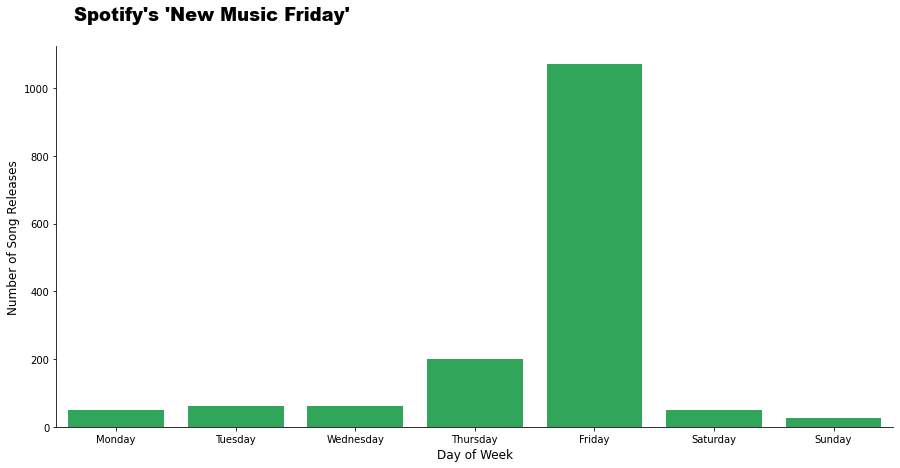

In [20]:
releases_DOW = data['release_DOW'].value_counts().reset_index().rename(columns={'index':'DOW','release_DOW':'count'})

fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data=releases_DOW, x='DOW', y='count', order=day_of_week.values(), color='#1DB954')

plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Song Releases', fontsize=12)
ax.text(-0.35, 1200, "Spotify's 'New Music Friday'", 
        {'font':'Arial', 'fontsize': 18, 'fontweight':'heavy'})
sns.despine()

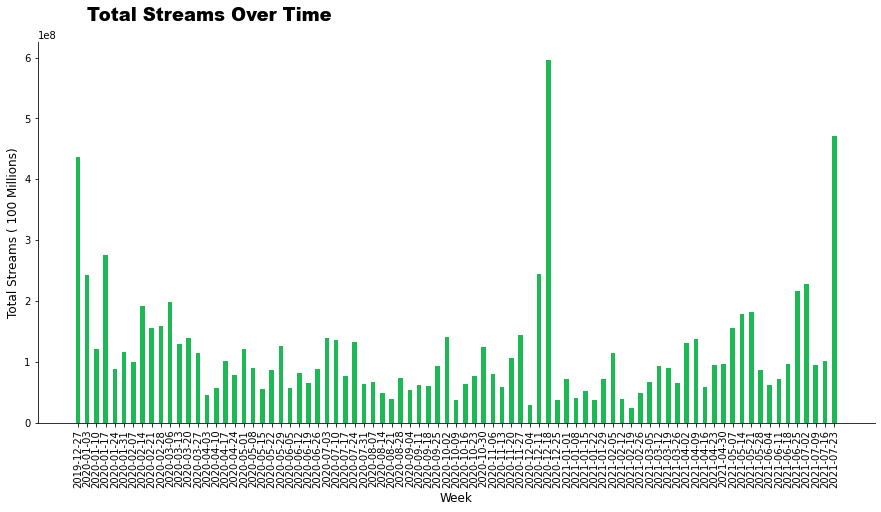

In [21]:
songs_ot = data.groupby('week_of_highest_charting_start')['streams'].sum().reset_index().sort_values('week_of_highest_charting_start', ascending=True)

fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(data=songs_ot, x='week_of_highest_charting_start', height='streams', width=0.5, color='#1DB954')

plt.xticks(rotation=90)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Streams ( 100 Millions)', fontsize=12)
ax.spines[['right', 'top']].set_visible(False)
ax.text(1, 660000000, "Total Streams Over Time", 
       {'font':'Arial', 'fontsize':18, 'fontweight':'heavy'})

plt.show()